<a href="https://colab.research.google.com/github/LeelaKarthik-26/IT7103/blob/main/IT7103_Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 05**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/real_estate_value.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
data.head()

,HouseAge,DistanceToMRT,NoOfStores,Latitude,Longitude,UnitPrice
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HouseAge       414 non-null    float64
 1   DistanceToMRT  414 non-null    float64
 2   NoOfStores     414 non-null    int64  
 3   Latitude       414 non-null    float64
 4   Longitude      414 non-null    float64
 5   UnitPrice      414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [37]:
data.describe()

,HouseAge,DistanceToMRT,NoOfStores,Latitude,Longitude,UnitPrice
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [38]:
from sklearn.model_selection import train_test_split

X=data.drop('UnitPrice',axis=1)
Y=data['UnitPrice']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

print(data.shape)
print(X_train.shape)
print(X_test.shape)



(414, 6)
(331, 5)
(83, 5)


In [39]:
data.isnull().sum()

HouseAge         0
DistanceToMRT    0
NoOfStores       0
Latitude         0
Longitude        0
UnitPrice        0
dtype: int64

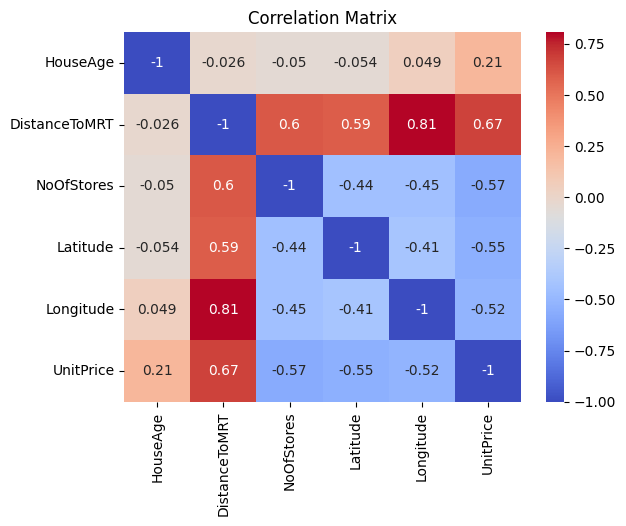

In [40]:
correaltion_matrix=-data.corr()
sns.heatmap(correaltion_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Distribution of Unit Price')

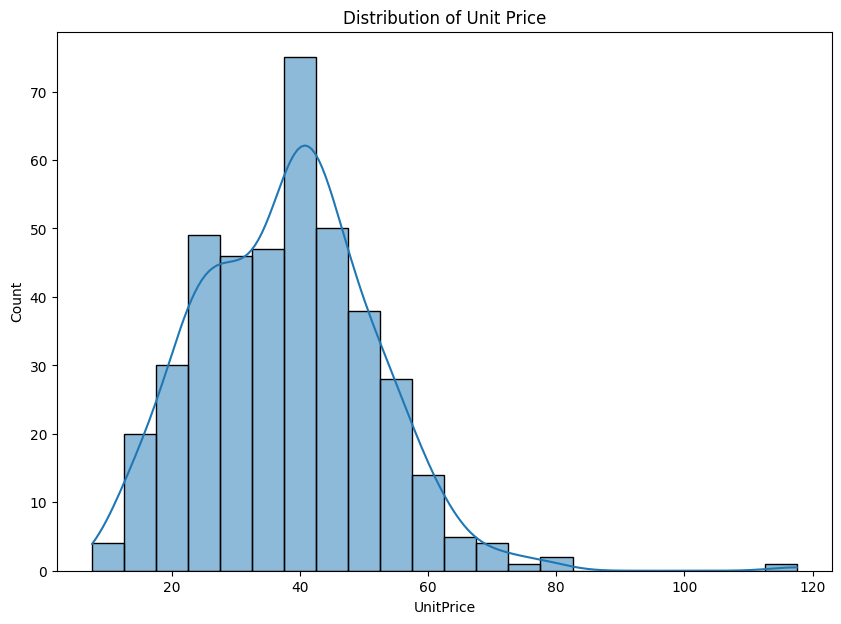

In [42]:
plt.figure(figsize=(10, 7))
sns.histplot(data['UnitPrice'], kde=True)
plt.title('Distribution of Unit Price')

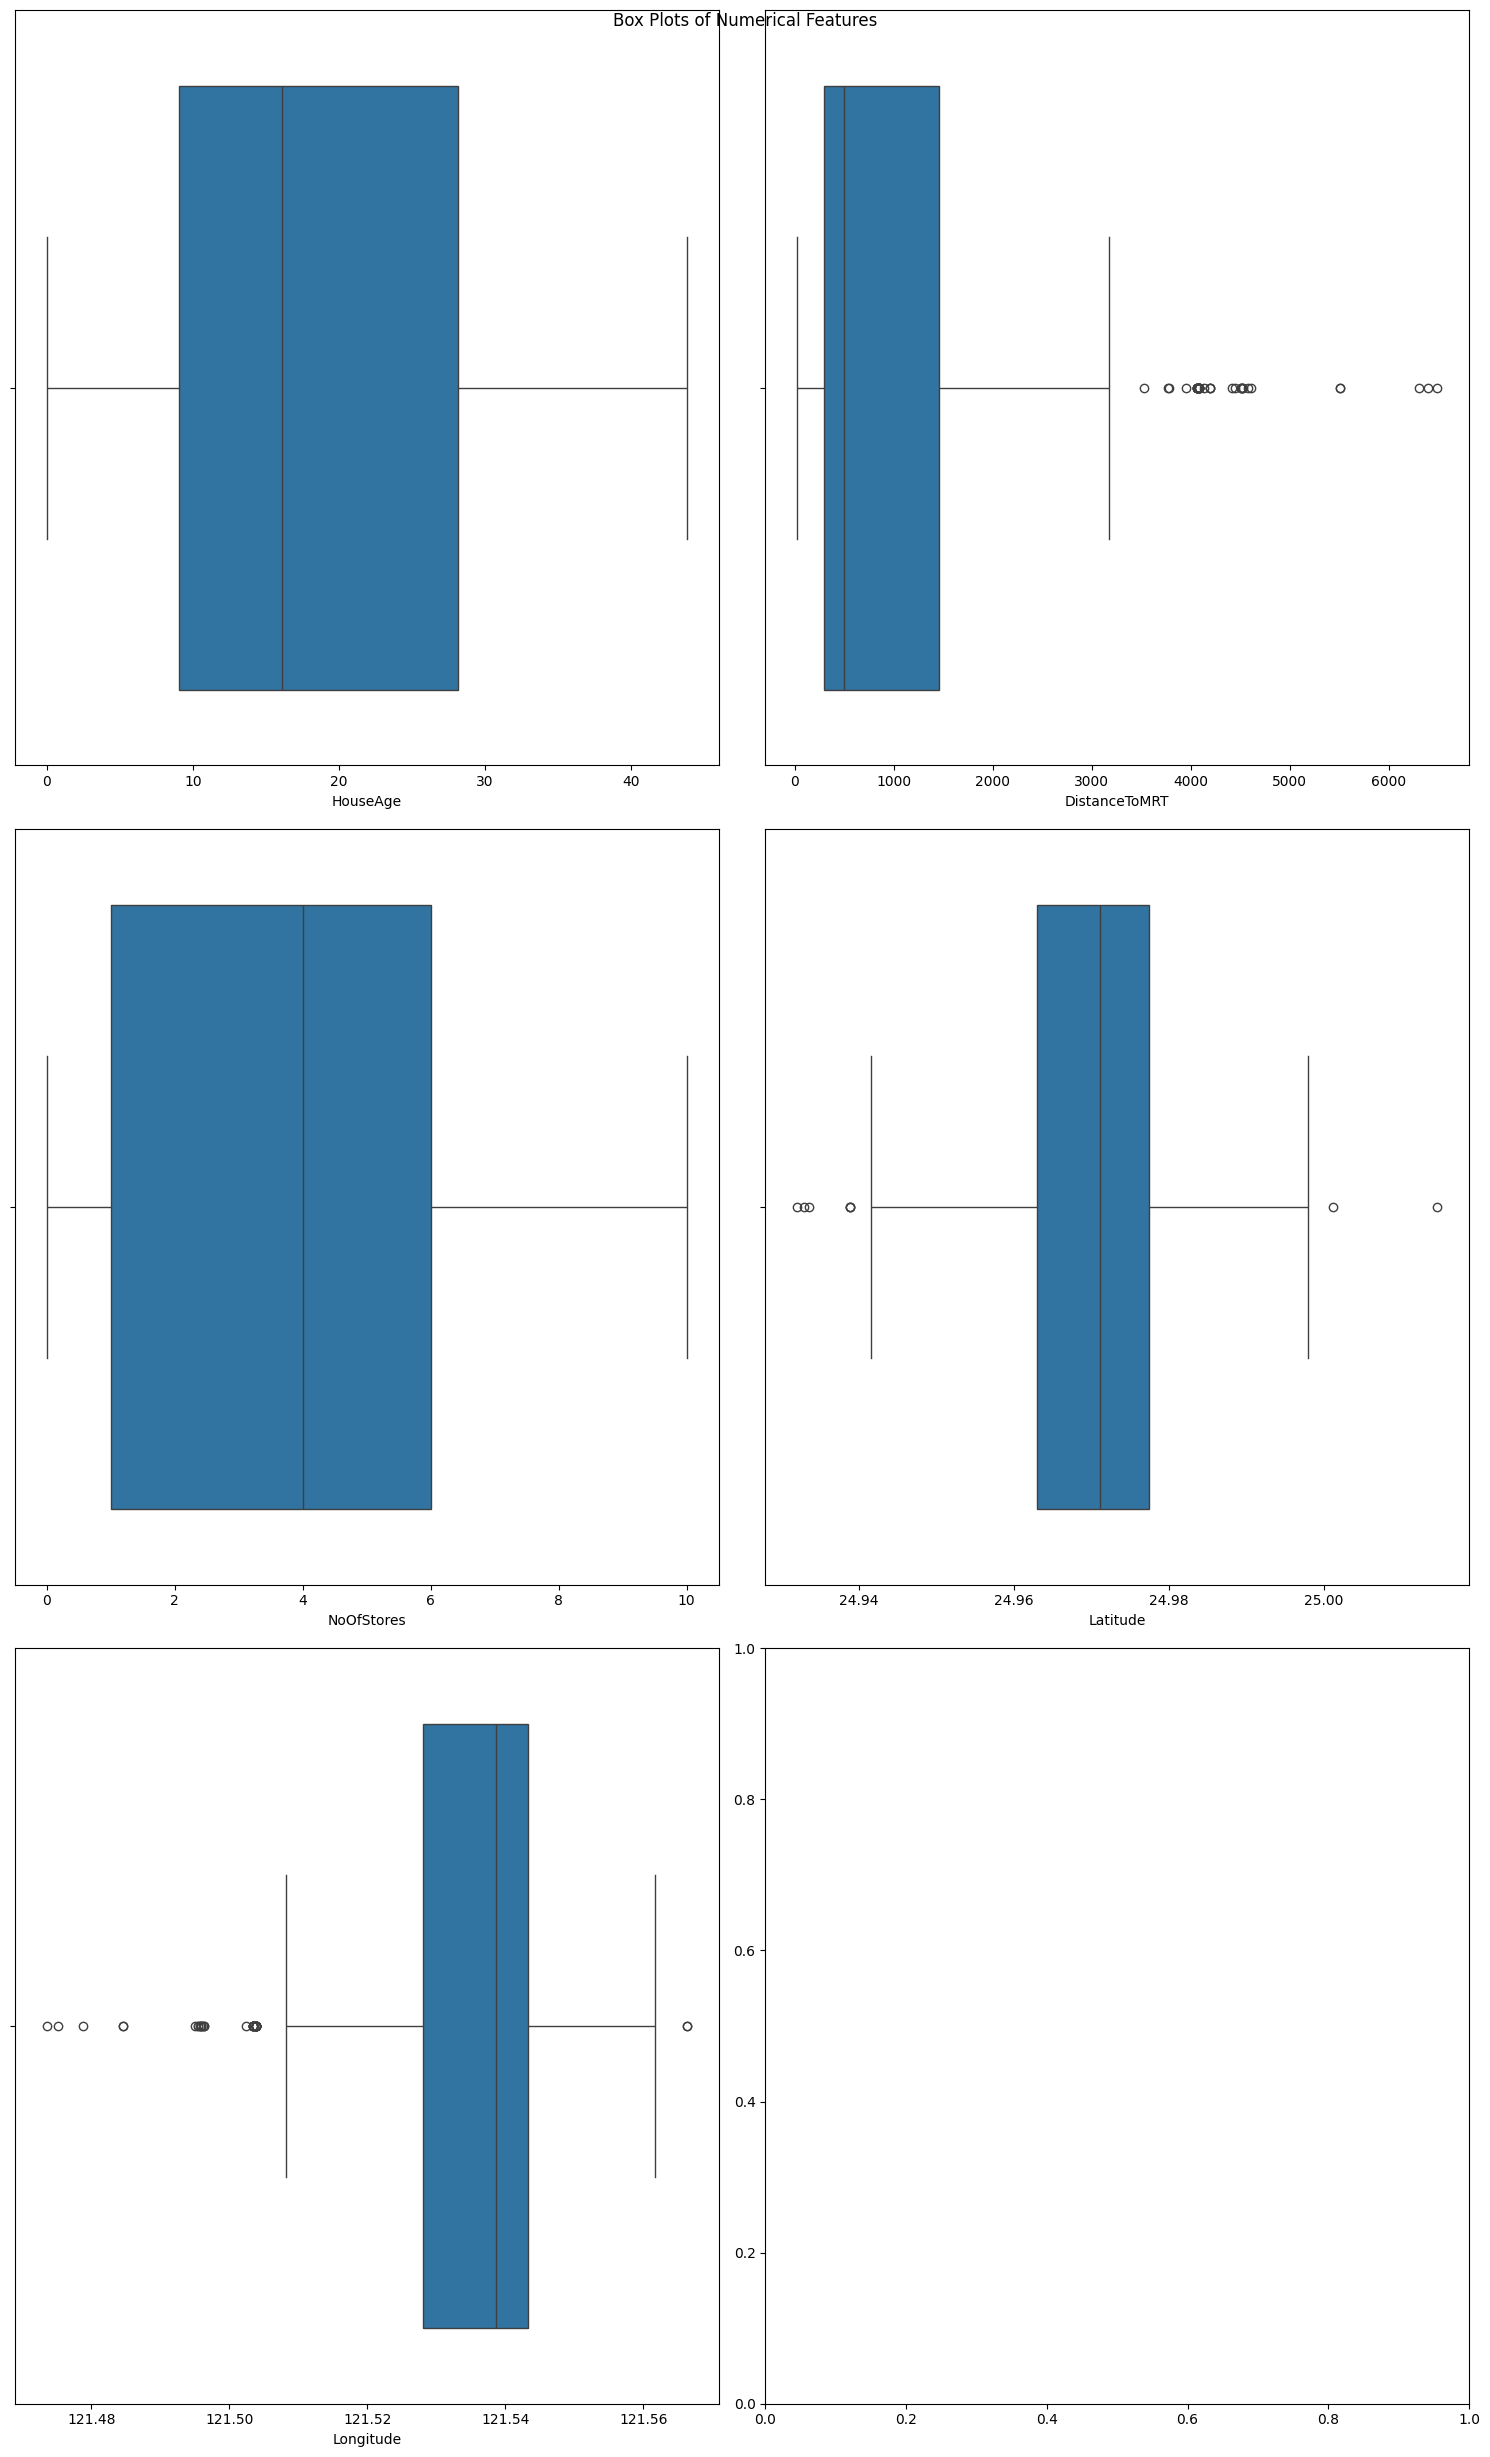

In [43]:
num_features=['HouseAge','DistanceToMRT','NoOfStores','Latitude','Longitude']
fig,axes=plt.subplots(3,2,figsize=(15,25))
fig.suptitle('Box Plots of Numerical Features')
for i,feature in enumerate(num_features):
  sns.boxplot(x=feature,data=data,ax=axes[i//2,i%2])
plt.tight_layout()

**Explaniation Steps:**
1. No Missing Values, so no imputation needed.
2. Features have different scales, so normalization or standardization is required.
3. Categorical variables are not therw so no encoding is needed.
4. Outliners in numerical feature specially in DistanceMRT
5. Wide range in DistanceMRT we can consider Log Transformation.
6. Consider polynomial features for latitude and longitude to capture non linear relationships


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

X['DistanceToMRT']=np.log1p(X['DistanceToMRT'])
poly =PolynomialFeatures(degree=2,include_bias=False,interaction_only=False)
X_poly=poly.fit_transform(X[['Latitude','Longitude']])
X_poly=pd.DataFrame(X_poly,columns=poly.get_feature_names_out(['Latitude','Longitude']))
X=X.drop(['Latitude','Longitude'],axis=1)
X=pd.concat([X,X_poly],axis=1)


scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)
print("Preprocesses data shape:",X_scaled.shape)
print("Train data shape:",X_train.shape)
print("Test data shape:",X_test.shape)

Preprocesses data shape: (414, 11)
Train data shape: (331, 11)
Test data shape: (83, 11)


In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt_params = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, Y_train)
best_dt = dt_grid.best_estimator_

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, Y_train)
best_rf = rf_grid.best_estimator_

print("Best Decision Tree parameters:", dt_grid.best_params_)
print("Best Random Forest parameters:", rf_grid.best_params_)

Best Decision Tree parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Random Forest parameters: {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 50}


In [47]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_dt=best_dt.predict(X_test)
y_pred_rf=best_rf.predict(X_test)

mse_dt=mean_squared_error(Y_test,y_pred_dt)
r2_dt=r2_score(Y_test,y_pred_dt)
mse_rf=mean_squared_error(Y_test,y_pred_rf)
r2_rf=r2_score(Y_test,y_pred_rf)

print("Decision Tree MSE:", mse_dt)
print("Decision Tree R2:", r2_dt)
print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)

Decision Tree MSE: 41.18196054264391
Decision Tree R2: 0.7545182209211521
Random Forest MSE: 30.362932182699733
Random Forest R2: 0.8190094276220435
